## Analysis of RL Evaluation Performance

In [132]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [4]:
pd.set_option('display.max_columns', None)

### Actuated / Baseline Results

In [ ]:
# load data
df = pd.read_csv('../src/data/actuated_output/actuated_output_9000steps_moreInfo.csv')
df

In [6]:
df = df[df['num_vehicles'] != 0]

In [86]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          161659.538171
localCOEmission             4932.733414
localHCEmission               24.395986
localPMxEmission              26.341775
localNOxEmission             982.120171
localNoiseEmission           558.671151
local_fuel_consumption     51194.174864
dtype: float64

In [138]:
df[['localWaitingTime','localStoppedVehicles']].mean()

localWaitingTime        8527.401052
localStoppedVehicles      38.605328
dtype: float64

In [147]:
df.tls159_phase.value_counts()

8     1900
0     1881
5     1878
3      589
6      500
9      500
1      495
7      300
10     300
2      297
4      294
Name: tls159_phase, dtype: int64

In [111]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].describe()

,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,localNoiseEmission,local_fuel_consumption
count,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000
mean,161659.538171,4932.733414,24.395986,26.341775,982.120171,558.671151,51194.174864
std,71148.392174,2107.977845,9.967727,13.882439,518.588792,171.344259,22503.813742
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.584153,0.000000
25%,112245.933912,3214.353481,16.816778,17.214878,632.097585,452.418422,35540.623180
50%,156939.870355,5042.597812,25.088799,24.077436,891.976657,546.524912,49725.587378
75%,216087.356136,6742.382730,32.307772,36.090041,1376.911273,666.130636,68449.168332
max,358090.949834,9328.203731,49.180591,63.143881,2463.819377,1137.788603,113237.425938


### RL Results

#### Load episode data into one dataframe for each reward function

In [ ]:
# Load data for speed evaluation
inputdir = '../src/data/evaluation/speed'

speed_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('average-speed_200_df'):
        temp_df_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_speed['episode'] = i # add episode column
        speed_eval = speed_eval.append(temp_df_speed, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
speed_eval = speed_eval[speed_eval['num_vehicles'] != 0]

In [ ]:
# Load data for queue evaluation
inputdir = '../src/data/evaluation/queue'

queue_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_queue
    if file.startswith('queue_200_df'):
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i # add episode column
        queue_eval = queue_eval.append(temp_df_queue, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
queue_eval = queue_eval[queue_eval['num_vehicles'] != 0]

In [150]:
# Load data for waitTime evaluation
inputdir = '../src/data/evaluation/waitingTime'

waitTime_200_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_waitTime
    if file.startswith('waitingTime_200_df'):
        temp_df_waitTime200 = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime200['episode'] = i # add episode column
        waitTime_200_eval = waitTime_200_eval.append(temp_df_waitTime200, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
waitTime_200_eval = waitTime_200_eval[waitTime_200_eval['num_vehicles'] != 0]

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/518662208.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waitTime_200_eval = waitTime_200_eval.append(temp_df_waitTime200, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/518662208.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waitTime_200_eval = waitTime_200_eval.append(temp_df_waitTime200, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/518662208.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waitTime_200_eval = waitTime_200_eval.append(temp_df_waitTime200, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/518662208.py:14: FutureWarnin

In [154]:
# Load data for waitTime evaluation
inputdir = '../src/data/evaluation/waitingTime'

waitTime_400_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_waitTime
    if file.startswith('waitingTime_400_df'):
        temp_df_waitTime400 = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime400['episode'] = i # add episode column
        waitTime_400_eval = waitTime_400_eval.append(temp_df_waitTime400, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
waitTime_400_eval = waitTime_400_eval[waitTime_400_eval['num_vehicles'] != 0]

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/348665393.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waitTime_400_eval = waitTime_400_eval.append(temp_df_waitTime400, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/348665393.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waitTime_400_eval = waitTime_400_eval.append(temp_df_waitTime400, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/348665393.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  waitTime_400_eval = waitTime_400_eval.append(temp_df_waitTime400, ignore_index=True)
/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/348665393.py:14: FutureWarnin

In [ ]:
# Load data for waitTime evaluation
inputdir = '../src/data/evaluation/waitingTime'

waitTime_900_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_waitTime
    if file.startswith('waitingTime_900_df'):
        temp_df_waitTime900 = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime900['episode'] = i # add episode column
        waitTime_900_eval = waitTime_900_eval.append(temp_df_waitTime900, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
waitTime_900_eval = waitTime_900_eval[waitTime_900_eval['num_vehicles'] != 0]

In [ ]:
# Load data for emission evaluation
inputdir = '../src/data/evaluation/emission'

emission_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_emission
    if file.startswith('combined_emission_200_df'):
        temp_df_emission = pd.read_csv(os.path.join(inputdir, file))
        temp_df_emission['episode'] = i # add episode column
        emission_eval = emission_eval.append(temp_df_emission, ignore_index=True)
        i += 1
        
# remove all rows with 0 vehicles
emission_eval = emission_eval[emission_eval['num_vehicles'] != 0]

#### Get Emission Info

In [161]:
print('Queue')
print(queue_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())

Queue
localCO2Emission          133826.399346
localCOEmission             3977.022517
localHCEmission               21.415695
localPMxEmission              21.570812
localNOxEmission             806.669184
localNoiseEmission           457.479658
local_fuel_consumption     42382.136710
dtype: float64


In [147]:
queue_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/1741793804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,41.233408,1.286126,154055.558411,4425.771579,23.004139,25.412531,956.056589,48776.976519,462.821850,8561.864454,36.113611,0.0,1.0,0.0,1.0,0.0,1.0
2,42.825745,1.136250,141784.545504,4553.541220,26.939181,21.565981,793.306885,44933.979846,529.777008,6331.442945,38.195053,0.0,1.0,0.0,1.0,0.0,1.0
3,30.691962,1.340007,112339.437108,3443.777528,17.447854,17.489841,655.689425,35582.582410,378.476891,4427.275998,25.709949,0.0,1.0,0.0,1.0,0.0,1.0
4,37.897695,1.293040,132348.039088,3754.872625,20.428523,22.357678,836.098067,41898.127240,491.886462,4866.517707,32.431703,0.0,1.0,0.0,1.0,0.0,1.0
5,34.004497,1.402142,128615.787703,3707.401883,19.259669,21.030188,792.278929,40722.612162,424.439081,4829.463744,29.151771,0.0,1.0,0.0,1.0,0.0,1.0


In [145]:
print('Average Speed')
print(speed_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())


Average Speed
localCO2Emission          135901.950288
localCOEmission             3693.659587
localHCEmission               18.833195
localPMxEmission              23.061042
localNOxEmission             872.524854
localNoiseEmission           411.184573
local_fuel_consumption     43016.268308
dtype: float64


In [146]:
speed_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/968340222.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  speed_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,35.781900,1.374325,135112.200370,3955.326622,20.197099,21.857540,822.920049,42783.412363,424.491392,4716.500843,30.550309,0.0,1.0,0.0,1.0,0.0,1.0
2,31.345700,1.380231,118656.369602,3524.401324,17.865706,18.290689,692.220785,37583.718696,366.136087,2879.105677,25.722316,0.0,1.0,0.0,1.0,0.0,1.0
3,39.585160,1.115344,163920.454845,4188.963581,21.670740,29.867622,1126.274587,51859.740901,454.915532,8723.234401,35.407532,0.0,1.0,0.0,1.0,0.0,1.0
4,29.509551,1.380451,118778.630456,3100.744143,15.625297,20.156023,768.164246,37592.046346,377.557930,2998.084270,24.196629,0.0,1.0,0.0,1.0,0.0,1.0
5,35.293820,1.344145,143047.704693,3699.192441,18.808951,25.133804,953.057999,45264.208667,432.828660,8935.494944,29.644944,0.0,1.0,0.0,1.0,0.0,1.0


In [160]:
print('Wait Time 200')
print(waitTime_200_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())


Wait Time 200
localCO2Emission          122944.015714
localCOEmission             3931.759568
localHCEmission               20.244416
localPMxEmission              18.340119
localNOxEmission             685.593498
localNoiseEmission           425.919802
local_fuel_consumption     38954.612006
dtype: float64


In [153]:
waitTime_200_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/4125885268.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  waitTime_200_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,34.684624,1.214307,117864.853709,4327.470942,21.821512,15.249333,561.665204,37382.702803,421.226947,5301.475870,29.464085,0.0,1.0,0.0,1.0,0.0,1.0
2,31.823793,1.332558,124881.762945,3420.280283,17.961714,20.378254,775.243490,39536.467563,416.337835,2947.194164,25.951178,0.0,1.0,0.0,1.0,0.0,1.0
3,29.157127,1.346874,106134.287222,3335.044394,17.051525,15.551846,587.089616,33627.814151,370.599793,3353.361392,23.960718,0.0,1.0,0.0,1.0,0.0,1.0
4,40.199214,1.125883,145928.853949,4683.824568,24.284700,22.900630,846.322058,46228.723401,486.970787,7712.305836,35.239057,0.0,1.0,0.0,1.0,0.0,1.0
5,34.284512,1.346529,119910.320743,3892.177650,20.102629,17.620531,657.647121,37997.352113,434.463648,5659.862514,28.879910,0.0,1.0,0.0,1.0,0.0,1.0


In [159]:
print('Wait Time 400')
print(waitTime_400_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())


Wait Time 400
localCO2Emission          144625.405660
localCOEmission             4256.799962
localHCEmission               22.807803
localPMxEmission              23.303580
localNOxEmission             873.634615
localNoiseEmission           485.906333
local_fuel_consumption     45800.788922
dtype: float64


In [155]:
waitTime_400_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/2192217393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  waitTime_400_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,33.712689,1.283515,125621.825545,3722.921550,19.111616,20.158201,757.286090,39780.024510,422.462424,5029.116825,28.278368,0.0,1.0,0.0,1.0,0.0,1.0
2,30.256568,1.388339,115123.007808,3269.241107,16.957754,18.289233,695.185154,36452.539582,406.873344,3485.989939,24.468977,0.0,1.0,0.0,1.0,0.0,1.0
3,38.503356,1.342989,144318.386656,4180.749906,23.067932,23.566866,881.973590,45700.656182,500.432767,3791.969799,32.573826,0.0,1.0,0.0,1.0,0.0,1.0
4,44.226942,1.159447,174923.914967,4768.691259,25.518932,30.079749,1131.395169,55369.091675,518.479848,8315.096143,38.937395,0.0,1.0,0.0,1.0,0.0,1.0
5,45.972595,1.200340,163150.076473,5342.960613,29.386602,24.424625,902.353788,51704.876905,581.344748,5325.602908,40.833333,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# Get average local emission values for evaluation period

print('Waiting Time')
print(waitTime_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())

print('Average Speed')
print(speed_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())

print('Queue')
print(queue_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())

print('Emission')
print(emission_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())

In [ ]:

print('Pressure')
print(eval_pressure[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake')
print(eval_brake[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake Accel')
print(eval_brakeAccel[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

### Phase Transition Comparison

In [85]:
# Retrieve all possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

In [79]:
tls_allStates = eval_queue['tls_159_state'].tolist()

In [80]:
set(tls_allStates)

{'GGGGrrrrrrrrrrrrrrrr',
 'GGGgrrrrrrgGgGGrrrGG',
 'GGGgrrrrrrgGgGGrrrrr',
 'rrrrgGGGrrrrrrrGGGrG',
 'rrrrgGGGrrrrrrrGrrrr',
 'rrrrrrrrggrrrrrrGGGr',
 'rrrrrrrrggrrrrrrrrrr',
 'rrrrrrrryyrrrrrrrrrr',
 'rrrryyyyrrrrrrryrrrr',
 'yyygrrrrrryyyyyrrrrr',
 'yyyyrrrrrrrrrrrrrrrr'}

In [100]:
queue_0['tls159_state'].value_counts()

GGGgrrrrrrgGgGGrrrGG    715
rrrrgGGGrrrrrrrGGGrG    410
rrrrrrrrggrrrrrrGGGr    310
GGGgrrrrrrgGgGGrrrrr    239
rrrrrrrrggrrrrrrrrrr     73
rrrrgGGGrrrrrrrGrrrr     32
Name: tls159_state, dtype: int64

In [101]:
queue_1['tls159_state'].value_counts()

rrrrrrrrggrrrrrrrrrr    792
GGGgrrrrrrgGgGGrrrGG    626
rrrrgGGGrrrrrrrGGGrG    192
rrrrrrrrggrrrrrrGGGr     94
GGGgrrrrrrgGgGGrrrrr     69
rrrrgGGGrrrrrrrGrrrr      6
Name: tls159_state, dtype: int64

In [102]:
queue_2['tls159_state'].value_counts()

GGGgrrrrrrgGgGGrrrGG    661
rrrrrrrrggrrrrrrrrrr    484
rrrrgGGGrrrrrrrGGGrG    308
GGGgrrrrrrgGgGGrrrrr    211
rrrrrrrrggrrrrrrGGGr    115
Name: tls159_state, dtype: int64

In [109]:
# append all states collected during training to list
tls_allStates = df['tls159_state'].tolist()
tls_allStates.append(x for x in tls_159_states if x not in tls_allStates)

# get number of distinct phases
num_phases = len(tls_159_states)

# create list of tuples for state transitions
transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]


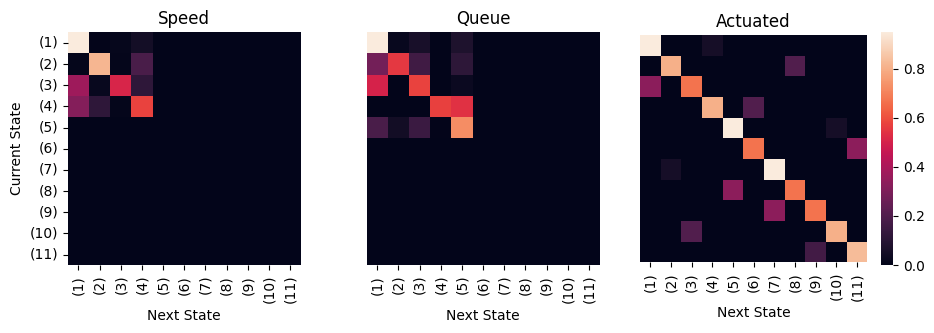

In [158]:
### ------ Phase Transition Matrix tls_159 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(waitTime_200_eval, 'Speed'), (waitTime_400_eval, 'Queue'), (df, 'Actuated')] # list of dataframes

num_dataframes = len(df_list)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 3, figsize=(9.8,3.2))

for i, (dataframe, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = list(set(phase for transition in transitions for phase in transition))
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=["({0})".format(i+1) for i in range(num_phases)], yticklabels=["({0})".format(i+1) for i in range(num_phases)] if i == 0 else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")

    # append all states collected during training to list
    tls_allStates = dataframe['tls159_state'].tolist()
    #tls_allStates.append(x for x in tls_159_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(tls_159_states)

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)
    #print(matrix)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix) 

    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_159_states, axs[i])

# Adjust the spacing between subplots

plt.tight_layout()

# Show the figure
plt.show()


### Polar Plots for Time Spent in State

In [63]:
# Retrieve all possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

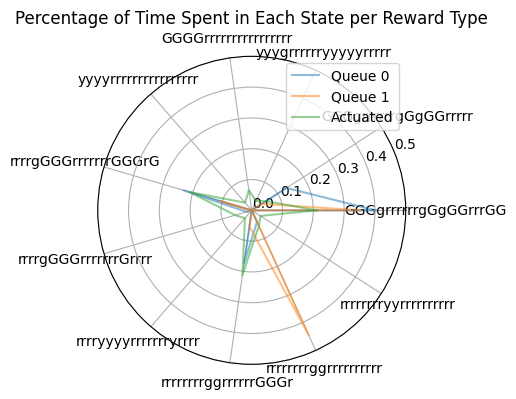

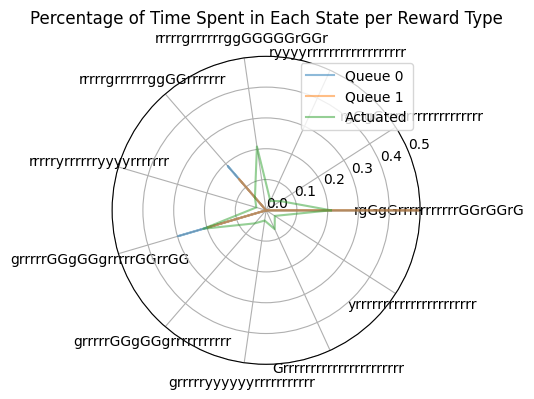

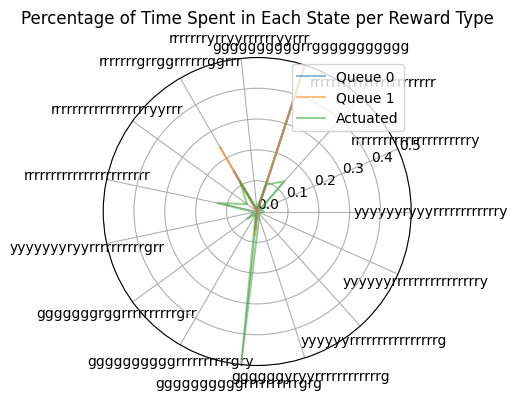

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# List of dataframes and corresponding policies
configs = [(queue_0, 'Queue 0'), (queue_1, 'Queue 1'), (df, 'Actuated')]
traffic_lights = ['tls159_state', 'tls160_state', 'tls161_state']
lists = [tls_159_states, tls_160_states, tls_161_states]

for i, tls in enumerate(traffic_lights):
    
    states = lists[i]

    # Create a figure
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

    # Create the angles for the polar plot
    angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

    # Make the plot circular
    angles += angles[:1]

    # Iterate over the configurations
    for df, policy in configs:
        # Calculate the time spent in each state
        time_in_state = df[tls].value_counts()

        # Normalize the values to range from 0 to 1
        values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

        # Repeat the first value to close the circular plot
        values += values[:1]

        # Plot the data for the current configuration
        ax.plot(angles, values, label=policy, alpha=0.5)

    # Add a legend
    ax.legend(loc='upper right')

    # Set ytick labels as decimals and limit the scale to 0.5
    yticks = np.linspace(0, 0.5, num=6)
    ax.set_yticks(yticks)
    ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

    # Set xtick labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(states)

    # Limit the radial axis to 0.5
    ax.set_ylim(0, 0.5)

    # Add a title
    ax.set_title('Percentage of Time Spent in Each State per Reward Type')

    plt.show()
